<a href="https://colab.research.google.com/github/naufalahnaf17/tensorflow_learning/blob/main/03_tensorflow_cnn_transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclassification Food 10 Classes Dataset

- Pembuatan CNN Sederhana tanpa Augmentasi
- Pembuatan CNN Sederhana dengan Augmentasi
- Pembuatan CNN Sederhana dengan Augmentasi + Shuffle
- Pembuatan CNN Custom dengan Augmentasi + Shuffle
- Evaluasi 4 Model dan Visualisasikan
- Transfer Learning Features Extraction dengan Dataset Food
- Evaluasi Semua Model (4 Model Sebelumnya + 2 Model baru)

## Import hal apa saja yang diperlukan

In [57]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

from tensorflow.keras import models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical

## 1. Pembuatan CNN Sederhana tanpa Augmentasi

### Download File Dataset + Exploration Data

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-06-13 18:44:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.207, 173.194.79.207, 108.177.96.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.9MB/s    in 24s     

2024-06-13 18:44:33 (20.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



**Setup Dir Train dan Test**

In [15]:
train_dir = "./10_food_classes_all_data/train/"
test_dir = "./10_food_classes_all_data/test/"

**Setup Class Names Untuk Categori**

In [10]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


**Visualisasikan Data Gambar Random**

['1839233.jpg']
Image shape: (512, 512, 3)


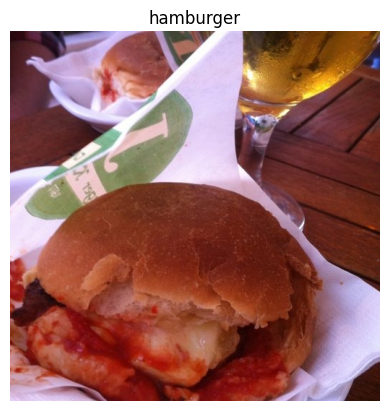

In [19]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### Preprocess Data tanpa Augmentation

In [20]:
def get_dataset_non_augmentation():

  train_datagen = ImageDataGenerator(rescale=1./255)
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_data = train_datagen.flow_from_directory(
      directory=train_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode="categorical",
      shuffle=False
  )

  test_data = test_datagen.flow_from_directory(
      directory=test_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode="categorical",
  )

  return train_data,test_data

In [22]:
train_data,test_data = get_dataset_non_augmentation()
train_data,test_data

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(<keras.src.preprocessing.image.DirectoryIterator at 0x7c81fe3ac0d0>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7c82727f7ca0>)

### Pembuatan Model CNN Tanpa Augmentation

In [24]:
model = models.Sequential()
model.add(Conv2D(10,(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(10,(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(10,(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10,activation="softmax"))

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=["accuracy"])

history_1 = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 36s 147ms/step - loss: 2.3157 - accuracy: 0.1049 - val_loss: 2.2991 - val_accuracy: 0.1364
Epoch 2/5
235/235 [==============================] - 31s 131ms/step - loss: 2.2736 - accuracy: 0.1592 - val_loss: 2.2320 - val_accuracy: 0.1644
Epoch 3/5
235/235 [==============================] - 33s 142ms/step - loss: 2.1864 - accuracy: 0.2109 - val_loss: 2.2153 - val_accuracy: 0.1940
Epoch 4/5
235/235 [==============================] - 42s 177ms/step - loss: 2.0697 - accuracy: 0.2585 - val_loss: 2.2388 - val_accuracy: 0.1868
Epoch 5/5
235/235 [==============================] - 30s 129ms/step - loss: 1.9170 - accuracy: 0.3221 - val_loss: 2.2887 - val_accuracy: 0.2012


### Visualisasikan Training Loss dan Accuracy

<Axes: >

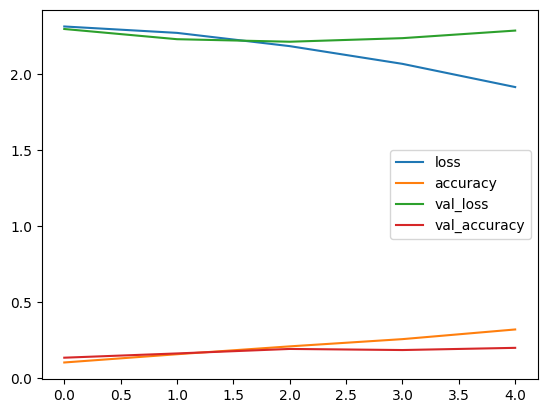

In [25]:
pd.DataFrame(history_1.history).plot()

### Kesimpulan Model 1

**Tingkat Akurasi : 20%**

**Kualitas Model  : Sangat Buruk**

## 2. Pembuatan Model CNN Sederhana dengan Augmentasi

### Exploration Data

**Setup Dir Train dan Test**

In [26]:
train_dir = "./10_food_classes_all_data/train/"
test_dir = "./10_food_classes_all_data/test/"

**Setup Class Names Untuk Categori**

In [27]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


**Visualisasikan Data Gambar Random**

['475092.jpg']
Image shape: (384, 512, 3)


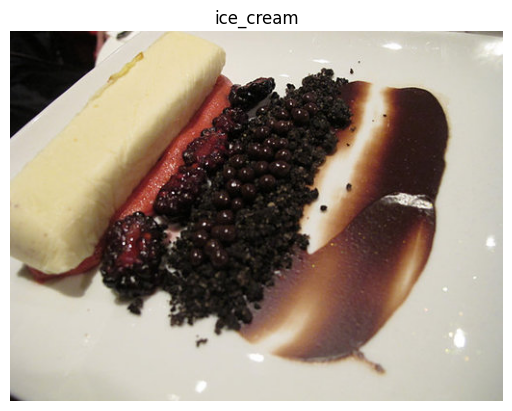

In [30]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### Preprocess Data dengan Augmentation

In [41]:
def get_dataset_augmentation():

  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=0.2,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2
  )
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_data = train_datagen.flow_from_directory(
      directory=train_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode="categorical",
      shuffle=False
  )

  test_data = test_datagen.flow_from_directory(
      directory=test_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode="categorical",
  )

  return train_data,test_data

In [32]:
train_data,test_data = get_dataset_augmentation()
train_data,test_data

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(<keras.src.preprocessing.image.DirectoryIterator at 0x7c817a667040>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7c817a77f7f0>)

### Pembuatan Model CNN dengan Augmentation

In [42]:
tf.random.set_seed(42)

model = models.Sequential()
model.add(Conv2D(10,(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(10,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(10,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10,activation="softmax"))

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=["accuracy"])

history_2 = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 39s 158ms/step - loss: 2.3139 - accuracy: 0.0719 - val_loss: 2.3024 - val_accuracy: 0.1156
Epoch 2/5
235/235 [==============================] - 32s 134ms/step - loss: 2.3033 - accuracy: 0.0869 - val_loss: 2.2927 - val_accuracy: 0.0996
Epoch 3/5
235/235 [==============================] - 33s 142ms/step - loss: 2.3018 - accuracy: 0.0927 - val_loss: 2.2884 - val_accuracy: 0.1308
Epoch 4/5
235/235 [==============================] - 31s 132ms/step - loss: 2.2858 - accuracy: 0.1351 - val_loss: 2.2595 - val_accuracy: 0.1576
Epoch 5/5
235/235 [==============================] - 31s 132ms/step - loss: 2.2674 - accuracy: 0.1512 - val_loss: 2.2292 - val_accuracy: 0.1796


### Visualisasikan Training Loss dan Accuracy

In [43]:
model.evaluate(test_data)

79/79 [==============================] - 8s 98ms/step - loss: 2.2292 - accuracy: 0.1796


[2.229189157485962, 0.17960000038146973]

<Axes: >

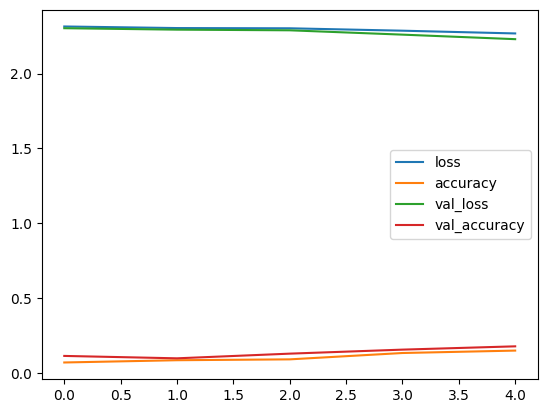

In [44]:
pd.DataFrame(history_2.history).plot()

### Kesimpulan Model 2

**Tingkat Akurasi : 18%**

**Kualitas Model  : Sangat Buruk**

## 3. Pembuatan Model CNN Sederhana dengan Augmentasi + Shuffle

### Exploration Data

**Setup Dir Train dan Test**

In [45]:
train_dir = "./10_food_classes_all_data/train/"
test_dir = "./10_food_classes_all_data/test/"

**Setup Class Names Untuk Categori**

In [46]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


**Visualisasikan Data Gambar Random**

['1417472.jpg']
Image shape: (512, 512, 3)


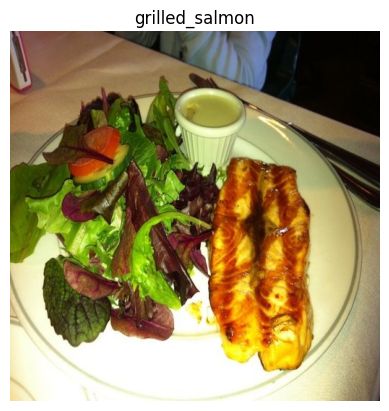

In [47]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### Preprocess Data dengan Augmentation + Shuffle

In [40]:
def get_dataset_augmentation_shuffle():

  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=0.2,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2
  )
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_data = train_datagen.flow_from_directory(
      directory=train_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode="categorical",
      shuffle=True #Shuffle
  )

  test_data = test_datagen.flow_from_directory(
      directory=test_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode="categorical",
  )

  return train_data,test_data

In [48]:
train_data,test_data = get_dataset_augmentation_shuffle()
train_data,test_data

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(<keras.src.preprocessing.image.DirectoryIterator at 0x7c813a3c6da0>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7c81fe4044c0>)

### Pembuatan Model CNN dengan Augmentation + Shuffle

In [49]:
tf.random.set_seed(42)

model = models.Sequential()
model.add(Conv2D(10,(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(10,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(10,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10,activation="softmax"))

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=["accuracy"])

history_3 = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 117s 490ms/step - loss: 2.2523 - accuracy: 0.1561 - val_loss: 2.0802 - val_accuracy: 0.2288
Epoch 2/5
235/235 [==============================] - 117s 498ms/step - loss: 2.1133 - accuracy: 0.2400 - val_loss: 1.9915 - val_accuracy: 0.3020
Epoch 3/5
235/235 [==============================] - 112s 476ms/step - loss: 2.0646 - accuracy: 0.2672 - val_loss: 1.9547 - val_accuracy: 0.3116
Epoch 4/5
235/235 [==============================] - 109s 464ms/step - loss: 2.0010 - accuracy: 0.2983 - val_loss: 1.9178 - val_accuracy: 0.3240
Epoch 5/5
235/235 [==============================] - 114s 486ms/step - loss: 1.9708 - accuracy: 0.3149 - val_loss: 1.8189 - val_accuracy: 0.3724


### Visualisasikan Training Loss dan Accuracy

In [50]:
model.evaluate(test_data)

79/79 [==============================] - 8s 100ms/step - loss: 1.8189 - accuracy: 0.3724


[1.8189342021942139, 0.3723999857902527]

<Axes: >

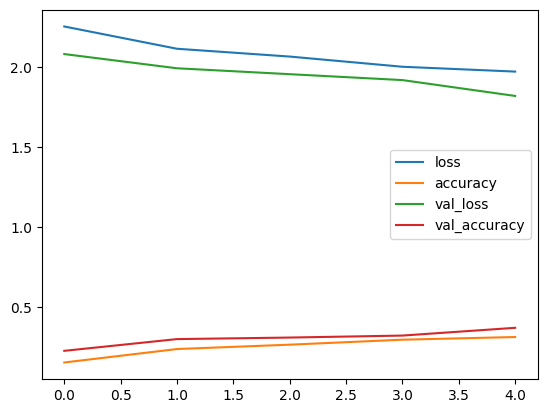

In [51]:
pd.DataFrame(history_3.history).plot()

### Kesimpulan Model 3

**Tingkat Akurasi : 37%**

**Kualitas Model  : Buruk**

## 4. Pembuatan Model CNN Custom dengan Augmentasi + Shuffle

### Exploration Data

**Setup Dir Train dan Test**

In [52]:
train_dir = "./10_food_classes_all_data/train/"
test_dir = "./10_food_classes_all_data/test/"

**Setup Class Names Untuk Categori**

In [53]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


**Visualisasikan Data Gambar Random**

['271592.jpg']
Image shape: (384, 512, 3)


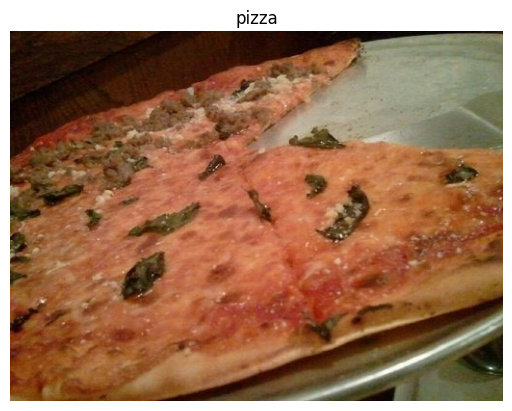

In [54]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### Preprocess Data dengan Augmentation + Shuffle

In [55]:
def get_dataset_augmentation_shuffle_custom():

  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2
  )
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_data = train_datagen.flow_from_directory(
      directory=train_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode="categorical",
      shuffle=True #Shuffle
  )

  test_data = test_datagen.flow_from_directory(
      directory=test_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode="categorical",
  )

  return train_data,test_data

In [56]:
train_data,test_data = get_dataset_augmentation_shuffle_custom()
train_data,test_data

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(<keras.src.preprocessing.image.DirectoryIterator at 0x7c813a5085e0>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7c817a60efb0>)

### Pembuatan Model CNN dengan Augmentation + Shuffle

In [61]:
tf.random.set_seed(42)

model = models.Sequential()
model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=["accuracy"])

history_4 = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 120s 491ms/step - loss: 2.2407 - accuracy: 0.1747 - val_loss: 2.0303 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 119s 507ms/step - loss: 2.0518 - accuracy: 0.2624 - val_loss: 1.9691 - val_accuracy: 0.2824
Epoch 3/5
235/235 [==============================] - 118s 502ms/step - loss: 1.9709 - accuracy: 0.3101 - val_loss: 1.8220 - val_accuracy: 0.3672
Epoch 4/5
235/235 [==============================] - 117s 497ms/step - loss: 1.9087 - accuracy: 0.3336 - val_loss: 1.7521 - val_accuracy: 0.3980
Epoch 5/5
235/235 [==============================] - 115s 489ms/step - loss: 1.8325 - accuracy: 0.3656 - val_loss: 1.7207 - val_accuracy: 0.4120


### Visualisasikan Training Loss dan Accuracy

In [62]:
model.evaluate(test_data)

79/79 [==============================] - 8s 99ms/step - loss: 1.7207 - accuracy: 0.4120


[1.7206623554229736, 0.41200000047683716]

<Axes: >

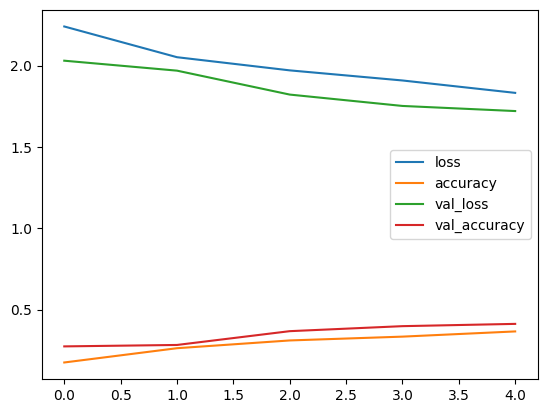

In [63]:
pd.DataFrame(history_4.history).plot()

### Kesimpulan Model 4

**Tingkat Akurasi : 41%**

**Kualitas Model  : Buruk**

## 5. Evaluasi 4 Model yang telah dibuat dan Visualisasikan

1. model 1 = 20% akurasi
2. model 2 = 17% akurasi
3. model 3 = 37% akurasi
4. model 4 = 41% akurasi

Dari 4 model yang telah dibuat masing masing model yang telah dibuat belum bisa menghasilkan akurasi diatas 50% artinya 4 model yang telah kita buat belum terlalu bagus

karna masing masing model yang dibuat hanya terdiri dari 3 layer maka dari itu untuk model sederhana hal yang wajar jika akurasi yang dihasilkan kurang maksimal

<Axes: >

<Figure size 640x480 with 0 Axes>

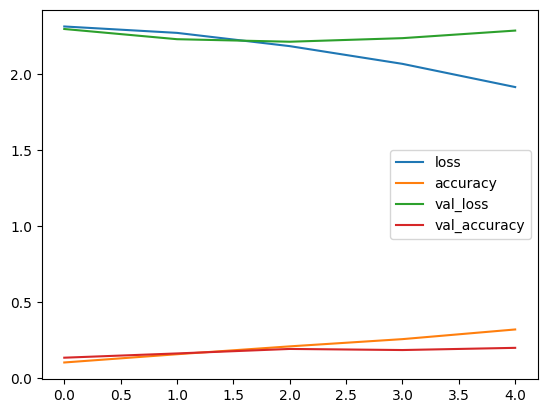

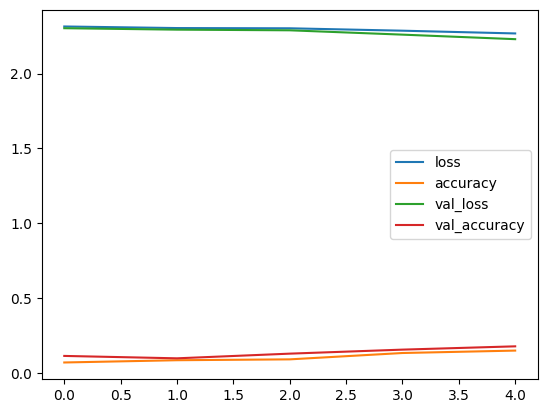

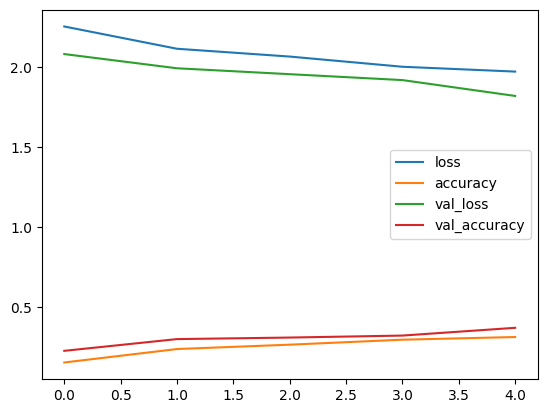

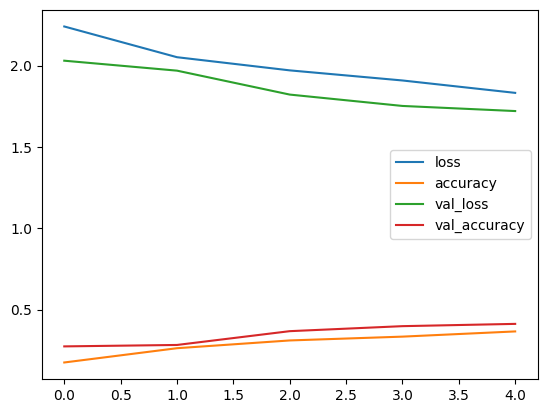

In [69]:
pd.DataFrame(history_1.history).plot()
pd.DataFrame(history_2.history).plot()
pd.DataFrame(history_3.history).plot()
pd.DataFrame(history_4.history).plot()

## Transfer Learning Features Extraction dengan Dataset Food (10)

kita akan menggunakan pretrained model
- Resnet50
- Efficientnet

### Resnet50

In [71]:
train_data,test_data = get_dataset_non_augmentation()
train_data,test_data

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(<keras.src.preprocessing.image.DirectoryIterator at 0x7c8128190880>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7c81e02c48b0>)

In [74]:
import tensorflow_hub as hub

resnet_url = "https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/classification/1"

resnet_model = hub.KerasLayer(
    resnet_url,
    trainable=False,
    name="resnet50",
    input_shape=(224, 224, 3))

model = models.Sequential()
model.add(resnet_model)
model.add(Dense(10,activation="softmax",name="output_layer"))

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=["accuracy"])

history_5 = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 50s 171ms/step - loss: 2.2746 - accuracy: 0.2725 - val_loss: 2.2326 - val_accuracy: 0.5568
Epoch 2/5
235/235 [==============================] - 44s 189ms/step - loss: 2.2068 - accuracy: 0.5367 - val_loss: 2.1624 - val_accuracy: 0.6052
Epoch 3/5
235/235 [==============================] - 37s 156ms/step - loss: 2.1417 - accuracy: 0.5707 - val_loss: 2.0954 - val_accuracy: 0.6252
Epoch 4/5
235/235 [==============================] - 40s 169ms/step - loss: 2.0795 - accuracy: 0.5951 - val_loss: 2.0318 - val_accuracy: 0.6300
Epoch 5/5
235/235 [==============================] - 40s 170ms/step - loss: 2.0207 - accuracy: 0.6017 - val_loss: 1.9705 - val_accuracy: 0.6348


In [75]:
model.evaluate(test_data)

79/79 [==============================] - 10s 123ms/step - loss: 1.9705 - accuracy: 0.6348


[1.9705407619476318, 0.6348000168800354]

<Axes: >

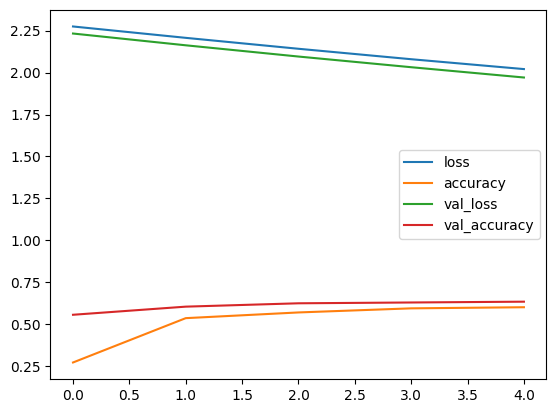

In [76]:
pd.DataFrame(history_5.history).plot()

#### Kesimpulan Model 5

**Tingkat Akurasi : 63%**

**Kualitas Model  : Cukup Baik**

### Efficientnet

In [77]:
train_data,test_data = get_dataset_non_augmentation()
train_data,test_data

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(<keras.src.preprocessing.image.DirectoryIterator at 0x7c80dc11b190>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7c80dc11bfd0>)

In [78]:
import tensorflow_hub as hub

efficientnet_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"

efficientnet_model = hub.KerasLayer(
    efficientnet_url,
    trainable=False,
    name="efficientnet",
    input_shape=(224, 224, 3))

model = models.Sequential()
model.add(efficientnet_model)
model.add(Dense(10,activation="softmax",name="output_layer"))

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=["accuracy"])

history_6 = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 51s 165ms/step - loss: 1.2128 - accuracy: 0.6357 - val_loss: 0.5586 - val_accuracy: 0.8728
Epoch 2/5
235/235 [==============================] - 34s 143ms/step - loss: 0.5990 - accuracy: 0.8227 - val_loss: 0.4433 - val_accuracy: 0.8680
Epoch 3/5
235/235 [==============================] - 36s 153ms/step - loss: 0.4903 - accuracy: 0.8493 - val_loss: 0.3652 - val_accuracy: 0.8956
Epoch 4/5
235/235 [==============================] - 34s 143ms/step - loss: 0.4354 - accuracy: 0.8687 - val_loss: 0.3370 - val_accuracy: 0.8992
Epoch 5/5
235/235 [==============================] - 35s 149ms/step - loss: 0.3906 - accuracy: 0.8821 - val_loss: 0.3169 - val_accuracy: 0.9084


In [79]:
model.evaluate(test_data)

79/79 [==============================] - 9s 113ms/step - loss: 0.3169 - accuracy: 0.9084


[0.31688135862350464, 0.9083999991416931]

<Axes: >

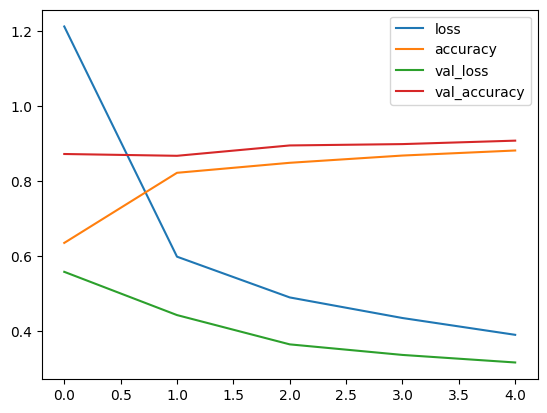

In [80]:
pd.DataFrame(history_6.history).plot()

1/1 [==============================] - 0s 113ms/step


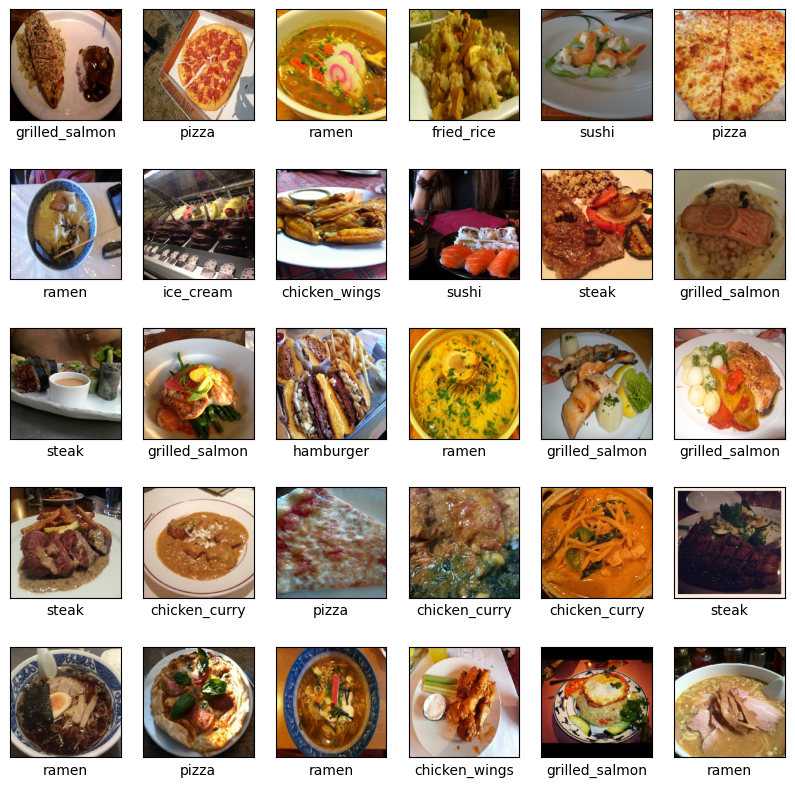

In [87]:
def show_prediction(model):
    sample_image, sample_label = next(iter(test_data))
    prediction = model.predict(sample_image)

    class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

    plt.figure(figsize=(10, 10))

    for i in range(30):
        plt.subplot(5, 6, i+1)
        plt.imshow(sample_image[i], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        predicted_label = class_names[int(np.argmax(prediction[i]))]
        plt.xlabel(predicted_label)

    plt.show()

show_prediction(model)

#### Kesimpulan Model 6

**Tingkat Akurasi : 91%**

**Kualitas Model  : Sangat Baik**

## 6. Evaluasi Semua Model dan Visualisasi Model 6 (Model Terbaik)

1. model 1 = 20% akurasi
2. model 2 = 17% akurasi
3. model 3 = 37% akurasi
4. model 4 = 41% akurasi
5. model 5 = 63% akurasi
6. model 6 = 91% akurasi

Dari semua model yang telah dibuat, hasil terbaik adalah model 6 dengan metode transfer learning (feature extractor) dengan model efficientnet

1/1 [==============================] - 0s 77ms/step


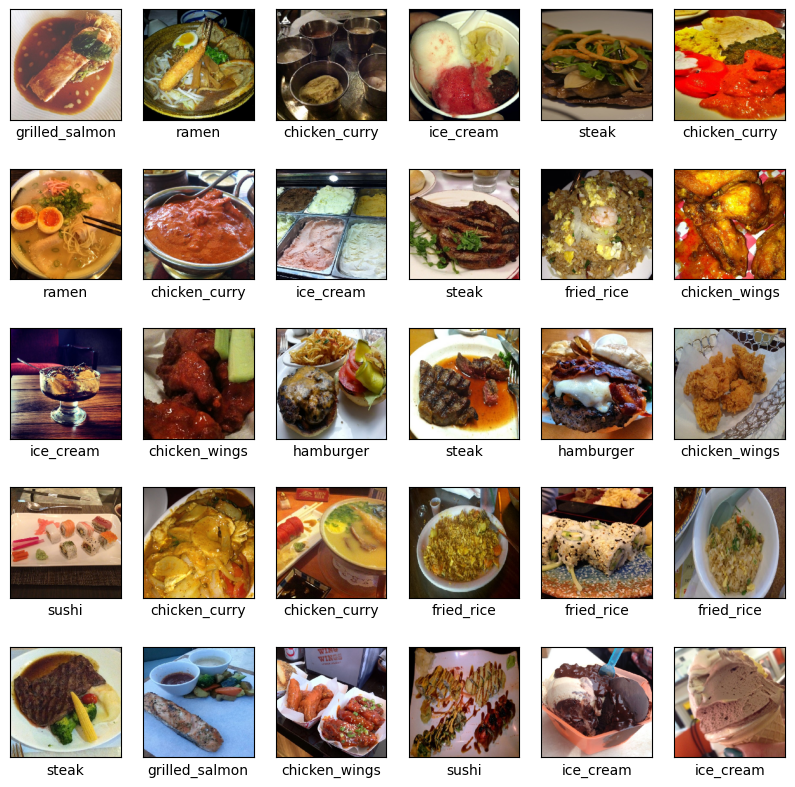

In [88]:
def show_prediction(model):
    sample_image, sample_label = next(iter(test_data))
    prediction = model.predict(sample_image)

    class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

    plt.figure(figsize=(10, 10))

    for i in range(30):
        plt.subplot(5, 6, i+1)
        plt.imshow(sample_image[i], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        predicted_label = class_names[int(np.argmax(prediction[i]))]
        plt.xlabel(predicted_label)

    plt.show()

show_prediction(model)